## Project Overview
For this project, we will perform regression modeling to analyze house sales in King County using the provided dataset kc_house_data.csv. Our goal is to provide insights into how various features of a house influence its sale price, which can be valuable for a real estate agency advising homeowners on potential home renovations and their impact on home value.

## Ojectives

Optimizing House Pricing Strategies

Estimating Renovation Impact on House Value

Identifying Factors Influencing House Sale Speed

Predicting the Optimal Time to Sell a House


## Importing necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

## Reading the data sets

In [72]:
# reading the kc house data into a data frame called df
df =pd.read_csv('C:/Users/user/Documents/Phase_2/Phase2_Project/dsc-group-6-phase-2-project/data/kc_house_data.csv')
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [74]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Exploratory Data Analysis (EDA)

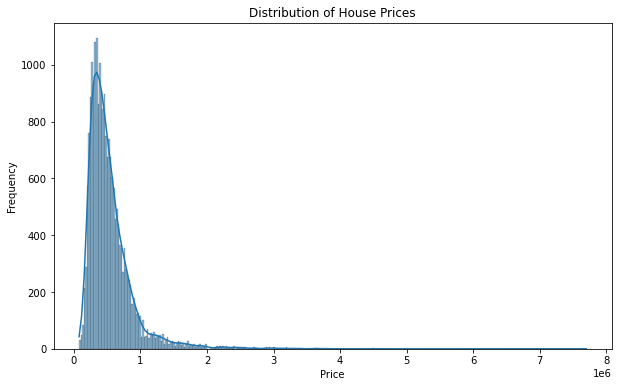

In [75]:
# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The house prices are right-skewed, indicating that most houses are priced on the lower end, with a few very high-priced houses.


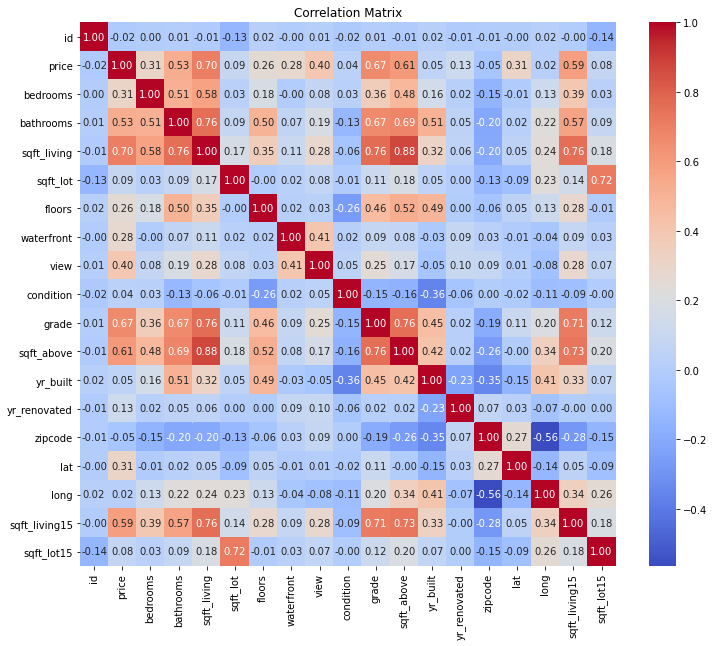

In [76]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<b>Obesrvation from correlation corr_matrix <b>

There is a strong positive correlation between sqft_living and price.

grade and sqft_above also show significant positive correlations with price.

Features like bathrooms and sqft_living15 also correlate positively with price.

In [77]:
# Handle missing values
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['view'].fillna(0, inplace=True)        # Assuming NaN means no view
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation

In [78]:
# Convert date column to datetime
df['date']=pd. to_datetime (df['date'])

In [79]:
# Encode categorical variables
df['waterfront'] =df['waterfront'].astype('category')

In [80]:
# Nomalize the  numerical columns data 
scaler =StandardScaler () # initialize the standard scaller
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Normalization and standardization are techniques used to rescale numerical features so they have similar scales, which can improve the performance and training stability of machine learning models

In [81]:
# cleaned dataset lets call it data
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  category      
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Future selection:

Identify the most relevant features for predicting house prices

In [82]:
# Future Selection
# Selecting relevant features for regression modeling
# removed 'sqft_basement', because its an object shall review it
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',  'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df [selected_features]
y = df['price']

In [83]:
#Model training
# Split the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state=42)
#Train a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict on the test set
y_pred = model.predict(X_test)



## Model Evaluation

In [84]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 39859951746.00499
R2 Score: 0.6938942526134868


The R2 score indicates that the model explains approximately 69% of the variance in the house prices, which is a reasonably good fit for the data.

### Visualization

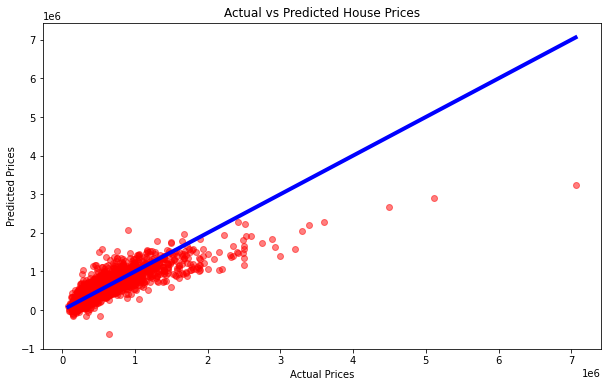

In [85]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

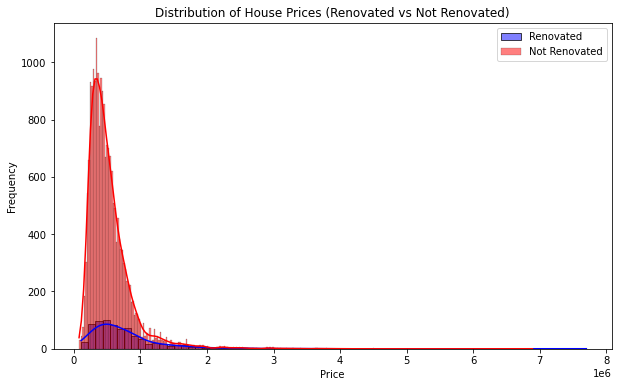

Mean Squared Error: 39859951746.00499
R2 Score: 0.6938942526134868


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 17 is different from 18)

In [87]:

# Analyze the impact of renovations on house prices
renovated = df[df['yr_renovated'] > 0]
not_renovated = df[df['yr_renovated'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(renovated['price'], kde=True, color='blue', label='Renovated')
sns.histplot(not_renovated['price'], kde=True, color='red', label='Not Renovated')
plt.title('Distribution of House Prices (Renovated vs Not Renovated)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Modeling and Prediction
# Select features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step 4: ROI Calculation
# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Example: Estimating the impact of adding a bathroom
def estimate_renovation_impact(features, renovation_type, increase):
    features[renovation_type] += increase
    return model.predict([features])[0]


# Estimate the impact of adding a bathroom
new_price = estimate_renovation_impact(example_features, features.index('bathrooms'), 1)
print(f"Price after adding a bathroom: ${new_price:.2f}")
print(f"Estimated increase in price: ${new_price - initial_price:.2f}")

# Step 5: Visualization and Reporting
# Visualizing the impact of renovations
renovations = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_basement']
impacts = []

for renovation in renovations:
    new_price = estimate_renovation_impact(example_features, features.index(renovation), 1)
    impacts.append(new_price - initial_price)

impact_df = pd.DataFrame({'Renovation': renovations, 'Estimated Increase in Price': impacts})

plt.figure(figsize=(10, 6))
sns.barplot(x='Renovation', y='Estimated Increase in Price', data=impact_df)
plt.title('Estimated Impact of Renovations on House Price')
plt.xlabel('Renovation Type')
plt.ylabel('Estimated Increase in Price ($)')
plt.show()